In [3]:
!pip install kagglehub


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smid80/weatherww2")

print("Path to dataset files:", path)

100%|██████████| 1.65M/1.65M [00:00<00:00, 2.14MB/s]

Extracting files...
Path to dataset files: C:\Users\Tomasz 2115\.cache\kagglehub\datasets\smid80\weatherww2\versions\1


C:\Users\Tomasz 2115\AppData\Local\Temp\ipykernel_26652\1473849838.py:6: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Summary of Weather.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WindGustSpd  0 non-null      float64
 1   MaxTemp      1500 non-null   float64
 2   MinTemp      1500 non-null   float64
 3   MeanTemp     1500 non-null   float64
 4   DR           0 non-null      float64
 5   SPD          0 non-null      float64
 6   MAX          1500 non-null   float64
 7   MIN          1500 non-null   float64
 8   MEA          1500 non-null   float64
 9   SND          0 non-null      float64
 10  FT           0 non-null      float64
 11  FB           0 non-null      float64
 12  FTI          0 non-null      float64
 13  ITH          0 non-null      float64
 14  PGT          0 non-null      float64
 15  SD3          0 non-null      float64
 16  RHX          0 non-null      float64
 17  RHN          0 non-null      float64
 18  RVG          0 non-null      float64
 19  WTE   

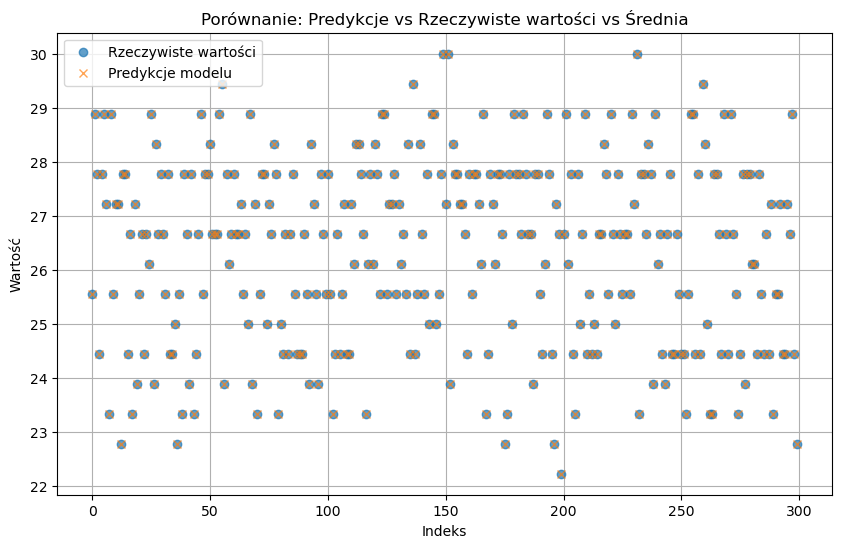

In [111]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Summary of Weather.csv')
data = data.head(1500)
df = data.select_dtypes(include=['float'])
df.info()
df= df.dropna(axis=1, how='all')
df = df.fillna(0)
df.info()
X = df.drop('MeanTemp', axis=1)
y = df['MeanTemp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("R^2:", r2_score(y_test, y_pred_lr))

# Tworzenie wykresu rzeczywistych wartości vs. predykcje vs. średnia
plt.figure(figsize=(10, 6))

# Rzeczywiste wartości
plt.plot(y_test.values, label="Rzeczywiste wartości", marker='o', linestyle='', alpha=0.7)

# Predykcje modelu
plt.plot(y_pred_lr, label="Predykcje modelu", marker='x', linestyle='', alpha=0.7)


# Dodanie tytułów i legendy
plt.title("Porównanie: Predykcje vs Rzeczywiste wartości vs Średnia")
plt.xlabel("Indeks")
plt.ylabel("Wartość")
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

R^2: 0.9999838644646152
[[0.00987952 0.00537644 0.00987952 0.00537644 0.97346472]]


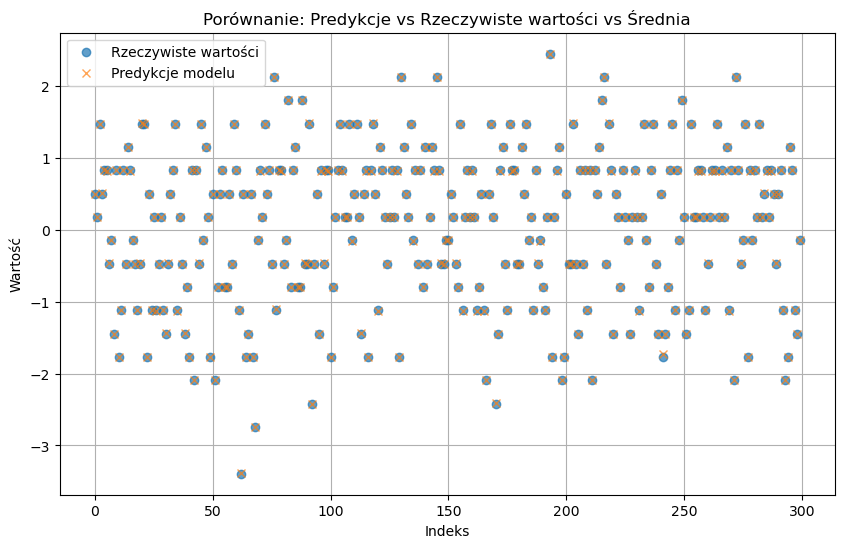

In [147]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
y_pred_lr = ridge.predict(X_test)
print("R^2:", r2_score(y_test, y_pred_lr))


feature_importance = abs(ridge.coef_)
print(feature_importance)

# Tworzenie wykresu rzeczywistych wartości vs. predykcje vs. średnia
plt.figure(figsize=(10, 6))

# Rzeczywiste wartości
plt.plot(y_test, label="Rzeczywiste wartości", marker='o', linestyle='', alpha=0.7)

# Predykcje modelu
plt.plot(y_pred_lr, label="Predykcje modelu", marker='x', linestyle='', alpha=0.7)


# Dodanie tytułów i legendy
plt.title("Porównanie: Predykcje vs Rzeczywiste wartości vs Średnia")
plt.xlabel("Indeks")
plt.ylabel("Wartość")
plt.legend()
plt.grid(True)




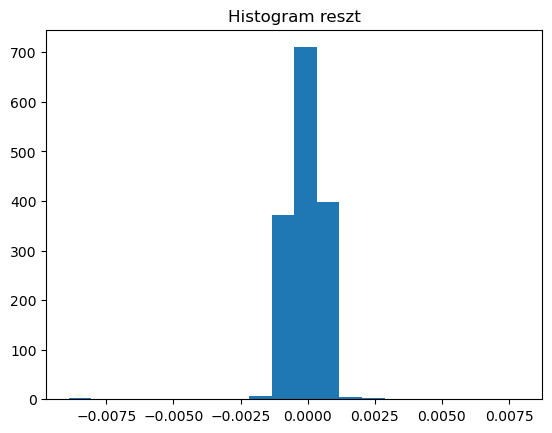

Statystyka Shapiro-Wilka: 0.7113724089868779 P-wartość: 5.3845807570164304e-45


In [115]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np

# Oblicz reszty
residuals = y - ridge.predict(X)

# Histogram reszt
plt.hist(residuals, bins=20)
plt.title("Histogram reszt")
plt.show()

# Test Shapiro-Wilka
stat, p = shapiro(residuals)
print("Statystyka Shapiro-Wilka:", stat, "P-wartość:", p)


In [117]:
from statsmodels.stats.stattools import durbin_watson

# Test Durbin-Watsona
dw_stat = durbin_watson(residuals)
print("Statystyka Durbin-Watsona:", dw_stat)


Statystyka Durbin-Watsona: 1.8504902607143376


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model

import numpy as np

print(y)
print(X)


y = np.array(y)

# Normalizacja danych
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Budowa sieci neuronowej
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Warstwa wyjściowa dla regresji
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


# Wizualizacja struktury sieci
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

# Trenowanie modelu
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=32)

# Ocena modelu
loss, mae = model.evaluate(X_test, y_test)
print("Średni błąd absolutny (MAE):", mae)

# Przewidywanie
y_pred = scaler_y.inverse_transform(model.predict(X_test))


# Oblicz współczynnik R²
r2 = r2_score(y_test, y_pred)
print(f"Współczynnik R²: {r2:.4f}")




[[-1.44555898]
 [-0.47146263]
 [-1.1208602 ]
 ...
 [ 0.17793493]
 [-0.47146263]
 [ 0.17793493]]
[[-1.74483174 -0.34010157 -1.74483174 -0.34010156 -1.44555898]
 [-0.44228648 -0.73343413 -0.44228648 -0.73343414 -0.47146263]
 [-1.52774087 -0.34010157 -1.52774087 -0.34010156 -1.1208602 ]
 ...
 [-0.2251956   0.83989615 -0.2251956   0.83989615  0.17793493]
 [-1.09355911  0.44656358 -1.09355911  0.44656358 -0.47146263]
 [-0.44228648  0.83989615 -0.44228648  0.83989615  0.17793493]]
You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/25


C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8824 - mae: 0.7466 - val_loss: 0.0599 - val_mae: 0.1691
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0372 - mae: 0.1342 - val_loss: 0.0159 - val_mae: 0.0962
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mae: 0.0934 - val_loss: 0.0126 - val_mae: 0.0847
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mae: 0.0821 - val_loss: 0.0109 - val_mae: 0.0778
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mae: 0.0731 - val_loss: 0.0100 - val_mae: 0.0738
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mae: 0.0661 - val_loss: 0.0080 - val_mae: 0.0646
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mae: 0.0589 - val_loss: 0.0066 - val_mae: 0.0572
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mae: 0.0555 - val_loss: 0.0052 - val_mae: 0.0515
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mae: 0.0443 - v

Średni błąd absolutny (MAE): 0.003761302214115858
Współczynnik R²: 0.9999


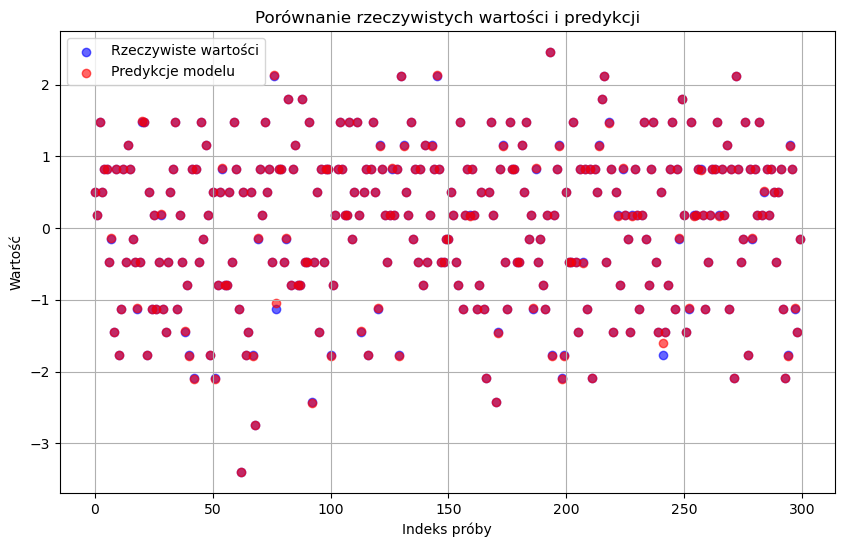

In [133]:


# Obliczenie współczynnika R²
r2 = r2_score(y_test, y_pred)
print(f"Średni błąd absolutny (MAE): {mae}")
print(f"Współczynnik R²: {r2:.4f}")

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Rzeczywiste wartości', color='blue', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predykcje modelu', color='red', alpha=0.6)

plt.title('Porównanie rzeczywistych wartości i predykcji')
plt.xlabel('Indeks próby')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()
